# MOwNiT 
## Laboratorium 4

### Tablice wielowymiarowe i mnożenie macierzy w Julii

In [1]:
# tablice wielowymiarowe w Julii
Asmall = [[1.0 4.0]; [0.0 1.0]]
Bsmall = Asmall
# size(B,1)

2×2 Array{Float64,2}:
 1.0  4.0
 0.0  1.0

#### Wersja naiwna

In [3]:
# mnożenie macierzy - wersja naiwna
function naive_multiplication(A,B)
    C = zeros(Float64, size(A,1), size(B,2))
    for i=1:size(A,1)
        for j=1:size(B,2)
            for k=1:size(A,2)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

naive_multiplication (generic function with 1 method)

In [3]:
#kompilacja
naive_multiplication(Asmall, Bsmall)

2×2 Array{Float64,2}:
 1.0  8.0
 0.0  1.0

In [4]:
#kompilacja
@elapsed naive_multiplication(Asmall, Bsmall)

2.9e-6

#### Wersja ulepszona

In [5]:
# Należy pamiętać o "column-major" dostępie do tablic - 
# pierwszy indeks zmienia się szybciej
# tak jak Matlab, R, Fortran 
# inaczej niz C, Python
A1 = [[1 2]; [3 4]]
display(A1)
vec(A1)

2×2 Array{Int64,2}:
 1  2
 3  4

4-element Array{Int64,1}:
 1
 3
 2
 4

In [4]:
# poprawiona funkcja korzytająca z powyższego oraz z faktu, że
# można zmieniać kolejność operacji dodawania (a co za tym idzie kolejnosc petli).
function better_multiplication(A, B)
    C = zeros(Float64, size(A,1), size(B,2))
    for j=1:size(B,2)
        for k=1:size(A,2)
            for i=1:size(A,1)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

better_multiplication (generic function with 1 method)

In [7]:
@elapsed better_multiplication(Asmall, Bsmall)

0.029936499

#### Wersja BLASowa

In [8]:
#kompilacja funkcji BLASowej do mnożenia macierzy
#https://docs.julialang.org/en/stable/stdlib/linalg/#BLAS-Functions-1
Asmall*Bsmall

2×2 Array{Float64,2}:
 1.0  8.0
 0.0  1.0

#### Porównanie wersji

In [9]:
A = rand(1000, 1000);
B = rand(1000, 1000);

In [10]:
@elapsed naive_multiplication(A, B)

3.2845567

In [11]:
@elapsed better_multiplication(A, B)

2.8886817

In [12]:
@elapsed A*B

0.0314885

### Wielomiany i aproksymacja średniokwadratowa

In [13]:
# pakiet Polynomials jest mozliwy do instalacji pod Juliabox
# https://github.com/JuliaMath/Polynomials.jl
# using Pkg
# Pkg.add("Polynomials")

In [14]:
# Przykładowa funkcja, którą będziemy aproksymować
myfun = exp

exp (generic function with 14 methods)

In [15]:
# aproksymacja sredniokwadratowa wielomianem - tutaj przyklad dla wielomianu 3 stopnia
using Polynomials
# tworzę punkty do aproksymacji (tutaj jako przykład wyliczone wartości funkcji e^x)
xs = 0:10
ys = map(myfun, xs)

# dopasowuje wielomian trzeciego stopnia do danych
fit_poly_3 = fit(xs, ys, 3)

Polynomial(-1086.8658708490193 + 2905.5721994684577*x - 1082.745723874463*x^2 + 100.44658880845408*x^3)

In [16]:
typeof(fit_poly_3)

Polynomial{Float64,:x}

In [17]:
# obliczanie wartosci wielomianu 
fit_poly_3(1)

836.4071935534294

In [18]:
using Plots

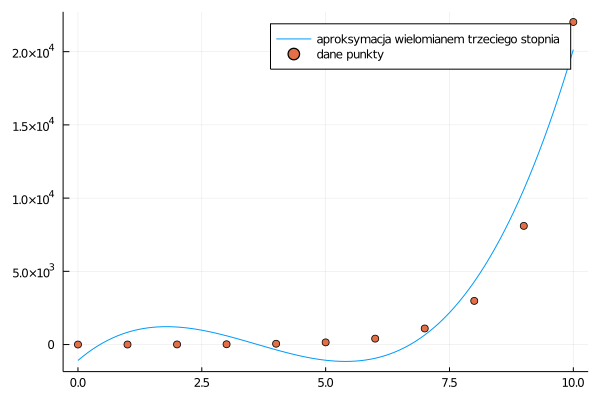

In [19]:
plot(fit_poly_3,  extrema(xs)..., label="aproksymacja wielomianem trzeciego stopnia")
# ! -dodanie do tego samego wykresu punktów wg ktorych aproksymowalismy
scatter!(xs, ys, label ="dane punkty")

### Wielomiany Czebyszewa w pakiecie Polynomials

In [20]:
# podajemy tablicę współczynników, gdzie wielomiany Czebyszewa są wielomianami bazowymi np dla T2(x)
t2 = ChebyshevT([0, 0, 1])

ChebyshevT(1⋅T_2(x))

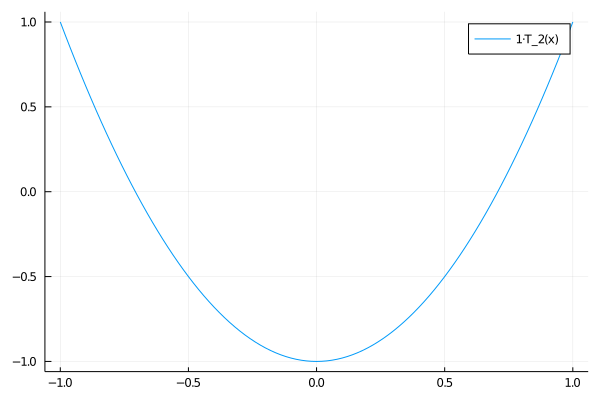

In [21]:
plot(t2)

In [22]:
#zera wielomianu Czebyszewa T2
Polynomials.roots(t2)

2-element Array{Float64,1}:
 -0.7071067811865475
  0.7071067811865476

In [23]:
# konwersja na wielomian
convert(Polynomial, t2)

Polynomial(-1.0 + 2.0*x^2)

In [24]:
# można tworzyć kombinacje liniowe w bazie wielomianów Czebyszewa
kombinacja_T = ChebyshevT([3,2,1])

ChebyshevT(3⋅T_0(x) + 2⋅T_1(x) + 1⋅T_2(x))

In [25]:
convert(Polynomial, kombinacja_T)

Polynomial(2.0 + 2.0*x + 2.0*x^2)

Skąd się wzieło polynomials logo :-)
https://juliamath.github.io/Polynomials.jl/stable/reference/#Example:-The-Polynomials.jl-logo-1

## Aproksymacja jednostajna Taylora i Pade

In [26]:
#using Pkg;
#Pkg.add("TaylorSeries")

In [27]:
using TaylorSeries

In [28]:
# Definiujemy, ile pierwszych wyrazów szeregu Taylora nas interesuje
t = Taylor1(Float64, 5)

 1.0 t + 𝒪(t⁶)

In [29]:
#Rozwinięcie Taylora 
myfun_taylor = myfun(t)

 1.0 + 1.0 t + 0.5 t² + 0.16666666666666666 t³ + 0.041666666666666664 t⁴ + 0.008333333333333333 t⁵ + 𝒪(t⁶)

In [30]:
# Julia hint - jak zapytać o pola typu danych
fieldnames(typeof(myfun_taylor))

(:coeffs, :order)

In [31]:
# mogę wyciągnąć ze struktury typu  odpowiednie pole
myfun_taylor.coeffs

6-element Array{Float64,1}:
 1.0
 1.0
 0.5
 0.16666666666666666
 0.041666666666666664
 0.008333333333333333

In [32]:
# Z przybliżenia Taylora tworzę wielomian zrozumiały dla pakietu Polynomials (typ Polynomial)
myfun_t_pol = Polynomial(myfun_taylor.coeffs)

Polynomial(1.0 + 1.0*x + 0.5*x^2 + 0.16666666666666666*x^3 + 0.041666666666666664*x^4 + 0.008333333333333333*x^5)

In [33]:
# mogę zamienić przybliżenie Taylora na aproksymację Pade (np. dla n=2, m=2)
myfun_pade = Polynomials.PolyCompat.PadeApproximation.Pade(myfun_t_pol, 2, 2)

Polynomials.PolyCompat.PadeApproximation.Pade{Float64,Float64}(Polynomial(1.0 + 0.5000000000000001*x + 0.08333333333333333*x^2), Polynomial(1.0 - 0.5*x + 0.08333333333333333*x^2), :x)

### Zadania
 
1. Uruchomić 
   - `naive_multiplication(A,B)`, 
   - `better_multiplication(A,B)` 
   - mnożenie BLAS w Julii (`A*B`) 

    dla coraz większych macierzy kwadratowych i zmierzyć czasy. Narysować wykres zależyności czasu od rozmiaru macierzy wraz z słupkami błędów, tak jak na poprzednim laboratorium. Wszystkie trzy metody powinny być na jednym wykresie. (1pkt)
 
 
2. Napisać w języku C:
   - naiwną metodę mnożenia macierzy kwadratowych (wersja 1) 
   - ulepszoną wersję za pomocą zamiany pętli metodę mnożenia macierzy(wersja 2), pamiętając, że w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej niż w Julii ! 
   - skorzystać z  możliwości BLAS poziom 3 dostępnego w GSL  (przykład uzycia https://www.gnu.org/software/gsl/doc/html/blas.html#examples )
    
    Należy porównywać działanie tych trzech algorytmow bez włączonej opcji optymalizacji kompilatora. Przedstawić wyniki na jednym wykresie tak jak w p.1. (osobno niż p.1).
    
    *(Dla chętnych)* sprawdzić, co się dzieje, jak włączymy optymalizację kompilatora i dodać do wykresu. (1 pkt)


3. Użyć funkcji `polyfit` z pakietu  Polynomials   do znalezienia odpowiednich wielomianów, które najlepiej pasują do zależności czasowych każdego z algorytmów. Stopień wielomianu powinien zgadzać się z teoretyczną złożonoscią. Dodać wykresy uzyskanych wielomianów do wcześniejszych wykresów. (1 pkt)

4. Pokazać zniwelowanie efektu Rungego  poprzez użycie wsparcia dla wielomianów Czebyszewa w pakiecie Polynomials. Wymagany wykres. (1 pkt)

5. Przybliżenie Pade jest często lepsze niż rozwinięcie w szereg Taylora przy aproksymowaniu funkcji, które posiadają osobliwości. Korzystając ze wsparcia dla aproksymacji Pade w pakiecie Polynomials pokazać dowolny przykład (wraz z wykresem), gdzie takie przybliżenie faktycznie jest lepsze. Można odtworzyć wykres z wykładu albo zainspirować się przykładowym artykułem https://www.hindawi.com/journals/ijcm/2014/587430/ (1 pkt)


In [1]:
using DataFrames
using Statistics
using Plots
using Polynomials
using TaylorSeries
using CSV

### Zadanie 1

1. Uruchomić 
   - `naive_multiplication(A,B)`, 
   - `better_multiplication(A,B)` 
   - mnożenie BLAS w Julii (`A*B`) 

    dla coraz większych macierzy kwadratowych i zmierzyć czasy. Narysować wykres zależyności czasu od rozmiaru macierzy wraz z słupkami błędów, tak jak na poprzednim laboratorium. Wszystkie trzy metody powinny być na jednym wykresie. (1pkt)
 

In [5]:
df = DataFrame(method=String[], n=Int[], time=Float64[])

A = ones(1,1)
naive_multiplication(A,A)
better_multiplication(A,A)
A*A

for n in 10:10:400
    for i in 1:1:10 
        A = rand(n, n)
        push!(df, ("jl_naive", n, @elapsed(naive_multiplication(A, A))))
        push!(df, ("jl_better", n, @elapsed(better_multiplication(A,A))))
        push!(df, ("jl_blas", n, @elapsed(A*A)))
    end
end

In [6]:
method_grouped=groupby(df, [:method, :n])
df_stat = combine(method_grouped, "time" => mean, "time" => std)

,method,n,time_mean,time_std
,String,Int64,Float64,Float64
1,jl_naive,10,1.9598e-6,6.55409e-7
2,jl_better,10,2.4801e-6,8.57363e-7
3,jl_blas,10,1.1301e-6,1.85496e-6
4,jl_naive,20,1.83601e-5,9.42954e-6
5,jl_better,20,1.82002e-5,6.8657e-7
6,jl_blas,20,2.2697e-6,1.81717e-6
7,jl_naive,30,5.11199e-5,3.66427e-6
8,jl_better,30,5.26803e-5,1.31715e-6
9,jl_blas,30,4.9999e-6,5.59085e-6


In [7]:
df_jl_naive= filter(row -> row.method == "jl_naive", df_stat)
df_jl_better= filter(row -> row.method == "jl_better", df_stat)
df_jl_blas= filter(row -> row.method == "jl_blas", df_stat)

,method,n,time_mean,time_std
,String,Int64,Float64,Float64
1,jl_blas,10,1.1301e-6,1.85496e-6
2,jl_blas,20,2.2697e-6,1.81717e-6
3,jl_blas,30,4.9999e-6,5.59085e-6
4,jl_blas,40,6.15e-6,1.96386e-6
5,jl_blas,50,1.48504e-5,5.05917e-6
6,jl_blas,60,4.33901e-5,9.00787e-6
7,jl_blas,70,0.00989762,0.0304804
8,jl_blas,80,0.00020608,3.35809e-5
9,jl_blas,90,0.00026316,7.38422e-5


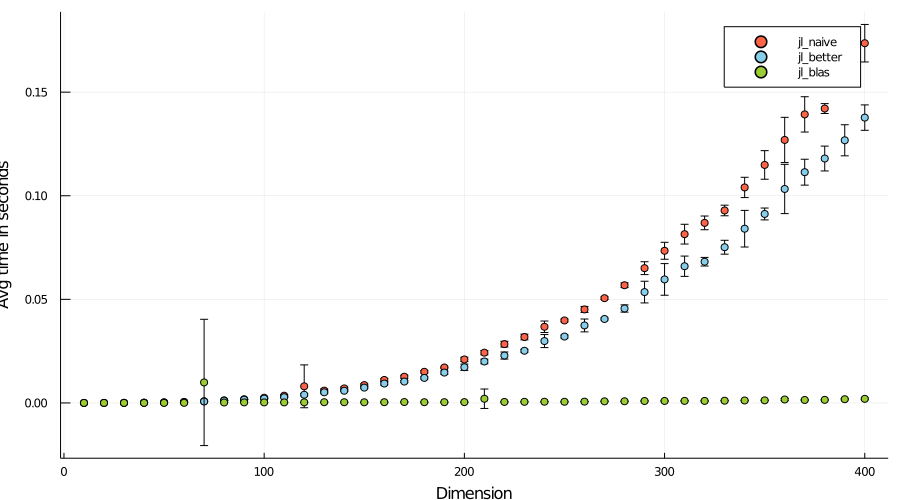

In [8]:
scatter([df_jl_naive.n], [df_jl_naive.time_mean],group=df_jl_naive.method, colour = [:tomato],
    yerr=df_jl_naive.time_std, xlabel = "Dimension", ylabel = "Avg time in seconds", size=(900, 500))

scatter!([df_jl_better.n], [df_jl_better.time_mean],group=df_jl_better.method, colour = [:skyblue],
    yerr=df_jl_better.time_std, xlabel = "Dimension", ylabel = "Avg time in seconds", size=(900, 500))

scatter!([df_jl_blas.n], [df_jl_blas.time_mean],group=df_jl_blas.method, colour = [:yellowgreen],
    yerr=df_jl_blas.time_std, xlabel = "Dimension", ylabel = "Avg time in seconds", size=(900, 500))

### Zadanie 2

2. Napisać w języku C:
   - naiwną metodę mnożenia macierzy kwadratowych (wersja 1) 
   - ulepszoną wersję za pomocą zamiany pętli metodę mnożenia macierzy(wersja 2), pamiętając, że w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej niż w Julii ! 
   - skorzystać z  możliwości BLAS poziom 3 dostępnego w GSL  (przykład uzycia https://www.gnu.org/software/gsl/doc/html/blas.html#examples )
    
    Należy porównywać działanie tych trzech algorytmow bez włączonej opcji optymalizacji kompilatora. Przedstawić wyniki na jednym wykresie tak jak w p.1. (osobno niż p.1).
    
    *(Dla chętnych)* sprawdzić, co się dzieje, jak włączymy optymalizację kompilatora i dodać do wykresu. (1 pkt)


#### Kod w C

```C
#include <stdio.h>
#include <time.h>
#include <sys/times.h>
#include <unistd.h>
#include <gsl/gsl_blas.h>
#include <stdlib.h>

long double gettime(clock_t t1, clock_t t2){
    return ((long double)(t2 - t1) / sysconf(_SC_CLK_TCK));
}


void naive_multiplication(int **matrixA, int **matrixB, int n){
    int* matrix[n];
    for (int i = 0; i < n; i++){
        matrix[i] = calloc(n, sizeof(int));
        for (int j = 0; j < n; j++){
            matrix[i][j] = 0;
        }
    }
    for (int k = 0; k < n; k++){
        for (int j = 0; j < n; j++){  
            for (int i = 0; i < n; i++){  
                matrix[i][j] += matrixA[i][k] * matrixB[k][j];
            }
        }
    } 
}

void better_multiplication(int** matrixA, int** matrixB, int n){
    int* matrix[n];
    for (int i = 0; i < n; i++){
        matrix[i] = calloc(n, sizeof(int));
        for (int j = 0; j < n; j++){
            matrix[i][j] = 0;
        }
    }
    for (int i = 0; i < n; i++){
        for (int j = 0; j < n; j++){  
            for (int k = 0; k < n; k++){
                matrix[i][j] += matrixA[i][k] * matrixB[k][j];
            }
        }
    }
}

void blas_multiplication(double* matrixA, double* matrixB, int n){
    double* matrix = malloc(sizeof(double) * n * n);
    gsl_matrix_view A = gsl_matrix_view_array(matrixA, n, n);
    gsl_matrix_view B = gsl_matrix_view_array(matrixB, n, n);
    gsl_matrix_view C = gsl_matrix_view_array(matrix, n, n);
    gsl_blas_dgemm (CblasNoTrans, CblasNoTrans,
                    1.0, &A.matrix, &B.matrix,
                    0.0, &C.matrix);
}

int** create_random_matrix(int x, int y){
    int ** matrix = calloc(x, sizeof(int*));

    for (int i = 0; i < x; i ++){
        int * values = calloc(y, sizeof(int));
        matrix[i] = values;
        for (int j = 0; j < y; j ++){
            values[j] = rand() % 100;
        }
    }
    return matrix;
}

double* create_random_blas_matrix(int x, int y){
    double* matrix = (double *)malloc(x*y*sizeof(double));
    for (int i = 0; i < (x*y); i++) {
        matrix[i] = (double) (rand() % 100);
    }
    return matrix;
}

int main(){
    srand(time(NULL));
    struct tms start_tms;
    struct tms end_tms;
    clock_t clock_start;
    clock_t clock_end;

    FILE *f = fopen("results.csv", "w+");

    for (int n = 10; n <= 400; n += 10){
        for (int i = 0; i < 10; i++){
            int ** matrixA = create_random_matrix(n, n);
            int ** matrixB = create_random_matrix(n, n);
            double *blasMatrixA = create_random_blas_matrix(n,n);
            double *blasMatrixB = create_random_blas_matrix(n,n);

            fprintf(f, "%i,%i,", n, i);

            clock_start = times(&start_tms);
            naive_multiplication(matrixA, matrixB, n);
            clock_end = times(&end_tms);
            fprintf(f, "%Lf,", gettime(clock_start, clock_end));

            clock_start = times(&start_tms);
            better_multiplication(matrixA, matrixB, n);
            clock_end = times(&end_tms);
            fprintf(f, "%Lf,", gettime(clock_start, clock_end));

            clock_start = times(&start_tms);
            blas_multiplication(blasMatrixA, blasMatrixB, n);
            clock_end = times(&end_tms);
            fprintf(f, "%Lf\n", gettime(clock_start, clock_end));
        }
    }
    
    fclose(f);
    return 0;
}
```

In [9]:
df_c = CSV.read("results.csv", DataFrame)
size_grouped=groupby(df_c, [:n])
df_c_naive = combine(size_grouped, "naive" => mean, "naive" => std)
df_c_better = combine(size_grouped, "better" => mean, "better" => std)
df_c_blas = combine(size_grouped, "blas" => mean, "blas" => std)

,n,blas_mean,blas_std
,Int64,Float64,Float64
1,10,0.0,0.0
2,20,0.0,0.0
3,30,0.0,0.0
4,40,0.0,0.0
5,50,0.0,0.0
6,60,0.0,0.0
7,70,0.001,0.00316228
8,80,0.001,0.00316228
9,90,0.001,0.00316228


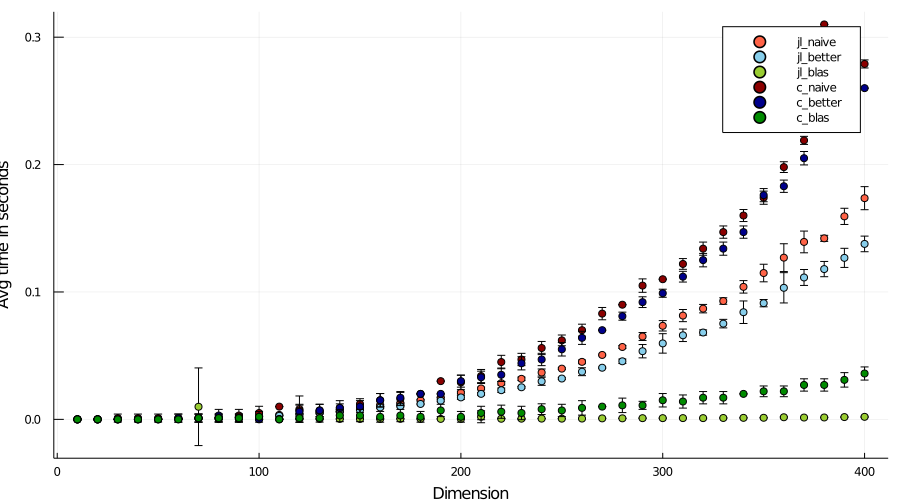

In [10]:
scatter!([df_c_naive.n], [df_c_naive.naive_mean], label = "c_naive", colour = [:red4],
    yerr=df_c_naive.naive_std, xlabel = "Dimension", ylabel = "Avg time in seconds", size=(900, 500))

scatter!([df_c_better.n], [df_c_better.better_mean], label = "c_better", colour = [:blue4],
    yerr=df_c_better.better_std, xlabel = "Dimension", ylabel = "Avg time in seconds", size=(900, 500))

scatter!([df_c_blas.n], [df_c_blas.blas_mean], label = "c_blas", colour = [:green4],
    yerr=df_c_blas.blas_std, xlabel = "Dimension", ylabel = "Avg time in seconds", size=(900, 500))

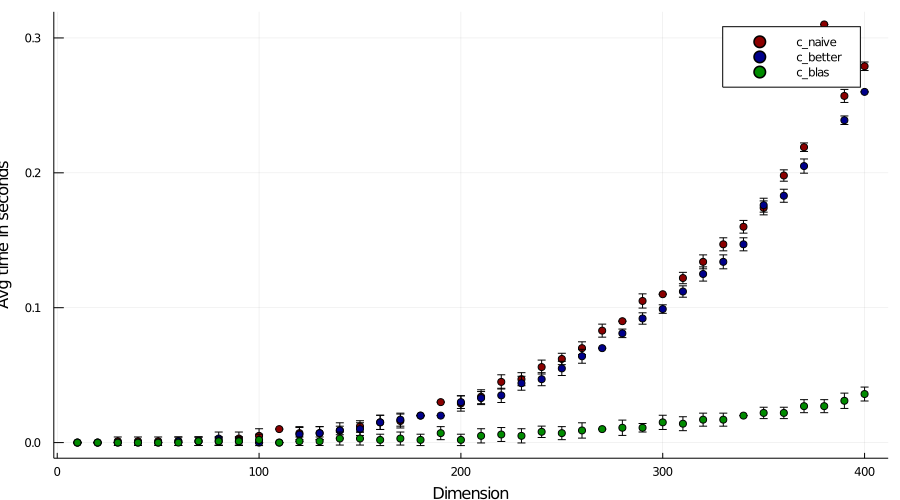

In [11]:
scatter([df_c_naive.n], [df_c_naive.naive_mean], label = "c_naive", colour = [:red4],
    yerr=df_c_naive.naive_std, xlabel = "Dimension", ylabel = "Avg time in seconds", size=(900, 500))

scatter!([df_c_better.n], [df_c_better.better_mean], label = "c_better", colour = [:blue4],
    yerr=df_c_better.better_std, xlabel = "Dimension", ylabel = "Avg time in seconds", size=(900, 500))

scatter!([df_c_blas.n], [df_c_blas.blas_mean], label = "c_blas", colour = [:green4],
    yerr=df_c_blas.blas_std, xlabel = "Dimension", ylabel = "Avg time in seconds", size=(900, 500))

### Zadanie 3

3. Użyć funkcji `polyfit` z pakietu  Polynomials   do znalezienia odpowiednich wielomianów, które najlepiej pasują do zależności czasowych każdego z algorytmów. Stopień wielomianu powinien zgadzać się z teoretyczną złożonoscią. Dodać wykresy uzyskanych wielomianów do wcześniejszych wykresów. (1 pkt)

In [12]:
jl_naive_poly = fit(df_jl_naive.n, df_jl_naive.time_mean, 3)
jl_better_poly = fit(df_jl_better.n, df_jl_better.time_mean, 3)
jl_blas_poly = fit(df_jl_blas.n, df_jl_blas.time_mean, 3)

Polynomial(0.0003382749798665041 + 1.370977544186374e-5*x - 9.637863251534257e-8*x^2 + 1.8398509231264955e-10*x^3)

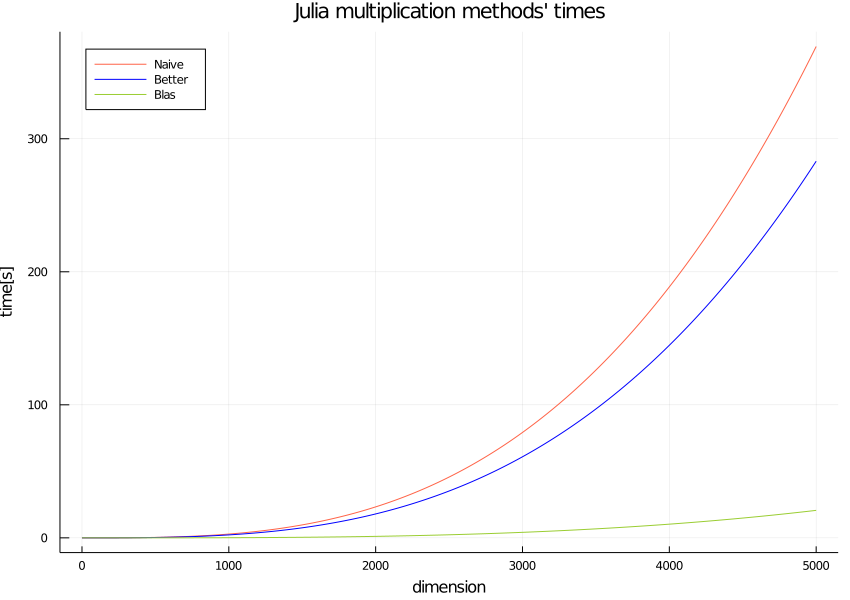

In [13]:
r = 0:10:5000;
jl_naive_poly_ys = [jl_naive_poly(x) for x in r]
jl_better_poly_ys = [jl_better_poly(x) for x in r]
jl_blas_poly_ys = [jl_blas_poly(x) for x in r]


scatter(title = "Julia multiplication methods' times", xlabel = "dimension", ylabel = "time[s]",
        size = (850, 600),legend = :topleft)
plot!(r, jl_naive_poly_ys, color=:tomato, label="Naive")
plot!(r, jl_better_poly_ys, color=:blue, label="Better")
plot!(r, jl_blas_poly_ys, color=:yellowgreen, label="Blas")

In [14]:
c_naive_poly = fit(df_c_naive.n, df_c_naive.naive_mean, 3)
c_better_poly = fit(df_c_better.n, df_c_better.better_mean, 3)
c_blas_poly = fit(df_c_blas.n, df_c_blas.blas_mean, 3)

Polynomial(-0.0008393259656417416 + 3.346974034946079e-5*x - 2.1849265251659457e-7*x^2 + 8.802259078403206e-10*x^3)

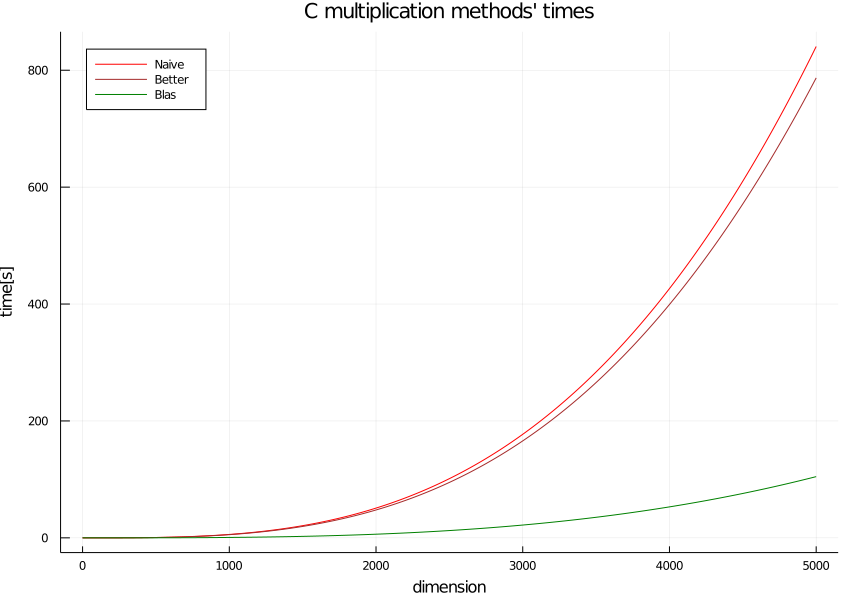

In [28]:
r = 0:10:5000;
c_naive_poly_ys = [c_naive_poly(x) for x in r]
c_better_poly_ys = [c_better_poly(x) for x in r]
c_blas_poly_ys = [c_blas_poly(x) for x in r]


scatter(title = "C multiplication methods' times", xlabel = "dimension", ylabel = "time[s]",
        size = (850, 600), legend = :topleft)
plot!(r, c_naive_poly_ys, color=:red, label="Naive")
plot!(r, c_better_poly_ys, color=:brown, label="Better")
plot!(r, c_blas_poly_ys, color=:green, label="Blas")

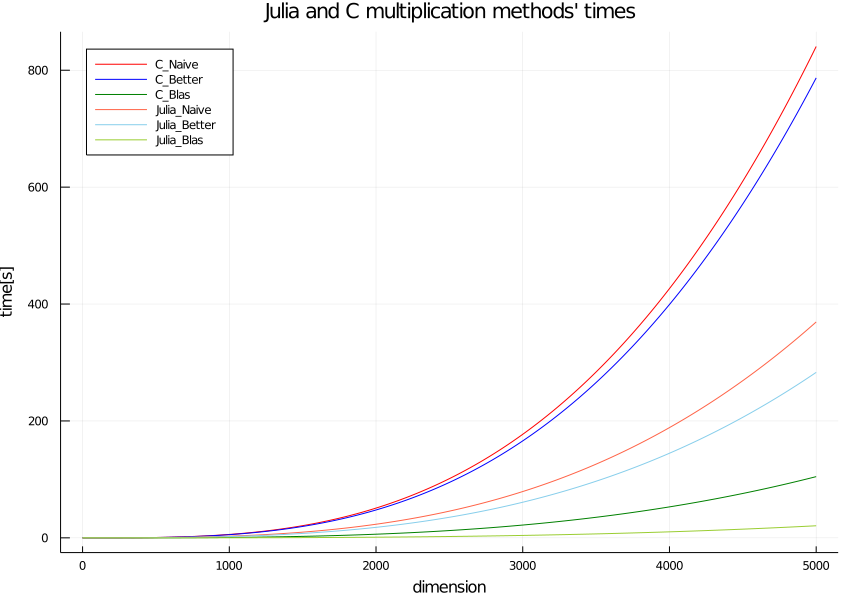

In [29]:
scatter(title = "Julia and C multiplication methods' times", xlabel = "dimension", ylabel = "time[s]",
        size = (850, 600), legend = :topleft)
plot!(r, c_naive_poly_ys, color=:red, label="C_Naive")
plot!(r, c_better_poly_ys, color=:blue, label="C_Better")
plot!(r, c_blas_poly_ys, color=:green, label="C_Blas")

plot!(r, jl_naive_poly_ys, color=:tomato, label="Julia_Naive")
plot!(r, jl_better_poly_ys, color=:skyblue, label="Julia_Better")
plot!(r, jl_blas_poly_ys, color=:yellowgreen, label="Julia_Blas")

### Zadanie 4

4. Pokazać zniwelowanie efektu Rungego  poprzez użycie wsparcia dla wielomianów Czebyszewa w pakiecie Polynomials. Wymagany wykres. (1 pkt)

In [17]:
function f(x)
    return 1/(1+15x^2)
end

f (generic function with 1 method)

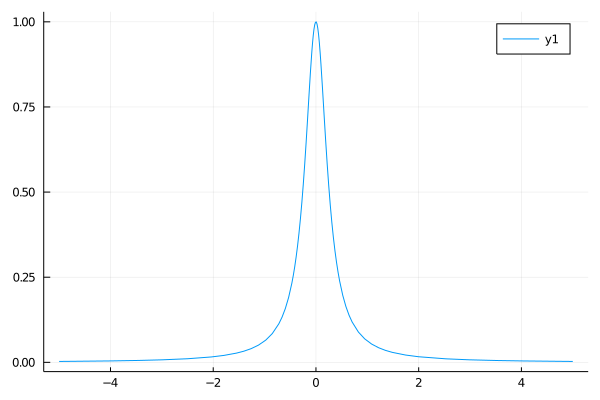

In [18]:
plot(f)

In [30]:
xs = -1:0.2:1 
ys = [f(x) for x in xs]
poly = fit(xs,ys)

Polynomial(1.0 + 5.551115123125783e-16*x - 12.155504300776911*x^2 + 5.329070518200751e-15*x^3 + 78.25167673938678*x^4 + 5.684341886080802e-14*x^5 - 229.93098353175276*x^6 + 291.50045142983475*x^8 + 2.842170943040401e-14*x^9 - 128.60314033669178*x^10)

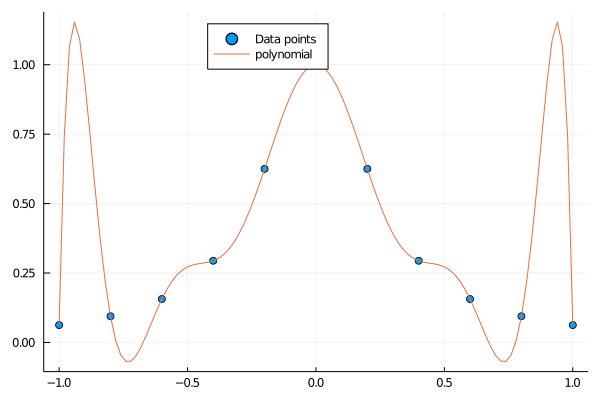

In [31]:
scatter(xs, ys, label = "Data points", legend=:top)
plot!(poly,  extrema(xs)..., label="polynomial")

In [32]:
cheb = ChebyshevT([0, 0, 0, 0, 0, 0, 0, 0, 0,  0,  0, 1])
roots = Polynomials.roots(cheb)
ys2 = [f(r) for r in roots]
poly2 = fit(roots, ys2)

Polynomial(1.0 + 2.6645352591003757e-15*x - 9.849152878283354*x^2 - 3.730349362740526e-14*x^3 + 44.72035073991738*x^4 + 1.4921397450962104e-13*x^5 - 93.9103834664951*x^6 - 1.9895196601282805e-13*x^7 + 90.03888883795959*x^8 + 1.0658141036401503e-13*x^9 - 31.96646940992649*x^10)

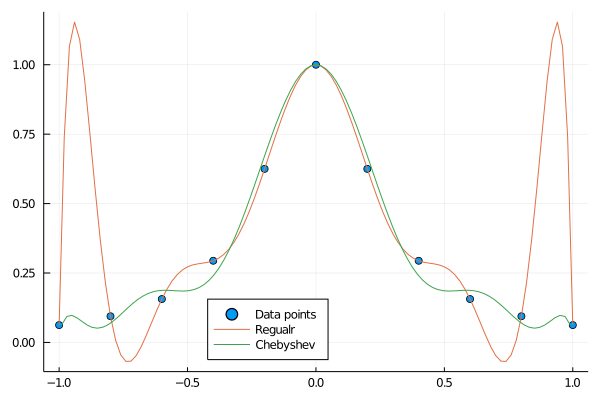

In [33]:
scatter(xs, ys, label = "Data points", legend=:bottom)

plot!(poly, extrema(xs)..., label="Regualr")
plot!(poly2, extrema(roots)..., label="Chebyshev")

### Zadanie 5

5. Przybliżenie Pade jest często lepsze niż rozwinięcie w szereg Taylora przy aproksymowaniu funkcji, które posiadają osobliwości. Korzystając ze wsparcia dla aproksymacji Pade w pakiecie Polynomials pokazać dowolny przykład (wraz z wykresem), gdzie takie przybliżenie faktycznie jest lepsze. Można odtworzyć wykres z wykładu albo zainspirować się przykładowym artykułem https://www.hindawi.com/journals/ijcm/2014/587430/ (1 pkt)

In [22]:
function g(x)
    return sqrt((1 + x))/(1 + x)
end

g (generic function with 1 method)

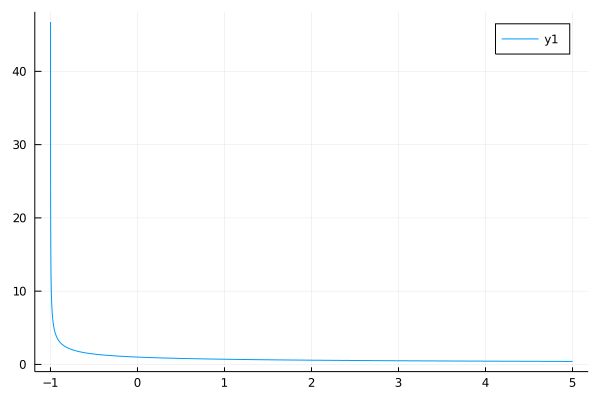

In [23]:
plot(g)

In [24]:
t = Taylor1(Float64, 5)
g_taylor = g(t)
g_poly = Polynomial(g_taylor.coeffs)

Polynomial(1.0 - 0.5*x + 0.375*x^2 - 0.3125*x^3 + 0.2734375*x^4 - 0.24609375*x^5)

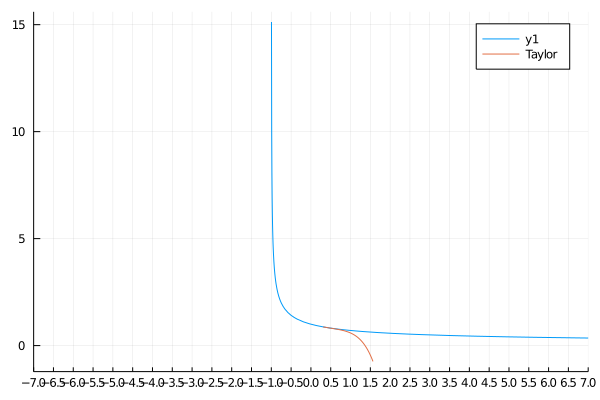

In [25]:
plot(g, xaxis = ((-7,7), -10:0.5:10))
plot!(g_poly, label="Taylor")

In [26]:
pade_app = Polynomials.PolyCompat.PadeApproximation.Pade(Polynomial(g_taylor.coeffs), 2, 2)

Polynomials.PolyCompat.PadeApproximation.Pade{Float64,Float64}(Polynomial(1.0 + 0.7500000000000007*x + 0.06250000000000011*x^2), Polynomial(1.0 + 1.2500000000000009*x + 0.31250000000000044*x^2), :x)

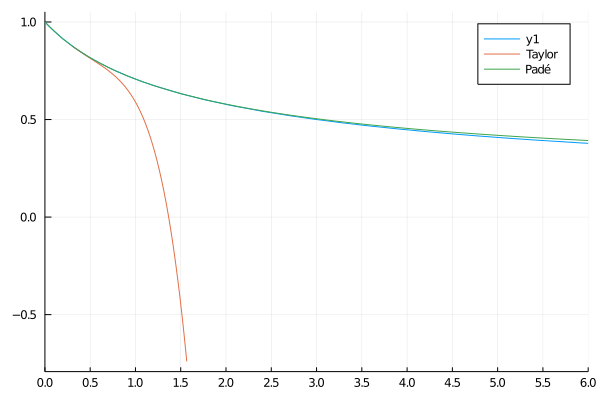

In [27]:
X2 = 0:0.1:6
Y2 = [pade_app(x) for x in X2]

plot(g, xaxis = ((0,6), -10:0.5:10))
plot!(g_poly, label="Taylor")
plot!(X2, Y2, label = "Padé")